# **Applied Machine Learning on Public Real Estate in Singapore**
## **Part II: Exploratory Data Analysis**

**Author:** Zachary Tang <br>
**Date published:** 01/02/2021 <br>
<br>
**Contact information:**
- Email: zacharytangjiaying@gmail.com
- [Github](https://github.com/ZacharyTangJiaYing) 
- [Linkedin](https://www.linkedin.com/in/zacharytang/)

**What determines the price of a resale HDB?** In this project, we attempt to predict resale HDB prices by training machine learning models on data of past transactions. We also perform geographical feature engineering to capture the effect of location on housing prices. With the trained model, we explore what features matters the most in predicting HDB prices. 

In **Part II** of the project, we perform exploratory data analysis to get a sense of our data and identify some trends in the resale HDB market.

## **1. Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

%matplotlib inline
plt.rc("axes.spines", top=False, right=False)
sns.set(rc={'figure.figsize':(15,10)}, font_scale=1.2, style='whitegrid')

## **2. Load Data**

Let's load the dataset we created from **Part I** of the project.

In [2]:
hdb_data_eda = pd.read_csv('/Users/zacharytang/Documents/OneDrive/Documents/Projects/Python/Data Analytics Portfolio/Machine Learning/HDB/Final Data/hdb_final_eda.csv')

In [3]:
hdb_data_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67092 entries, 0 to 67091
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   flat_type                         67092 non-null  object 
 1   flat_model                        67092 non-null  object 
 2   floor_area_sqm                    67092 non-null  float64
 3   resale_price                      67092 non-null  float64
 4   remaining_lease                   67092 non-null  float64
 5   storey_range                      67092 non-null  object 
 6   result_address                    67092 non-null  object 
 7   X                                 67092 non-null  float64
 8   Y                                 67092 non-null  float64
 9   latitude                          67092 non-null  float64
 10  longitude                         67092 non-null  float64
 11  pln_area                          67092 non-null  object 
 12  dist

In [4]:
hdb_data_eda.head()

,flat_type,flat_model,floor_area_sqm,resale_price,remaining_lease,storey_range,result_address,X,Y,latitude,...,dist_to_nearest_pharma,dist_to_nearest_bus_stops,dist_to_nearest_taxi_stands,dist_to_nearest_comm_clubs,dist_to_nearest_parks,year,month,dm_top_25_pri_within_1km,dm_top_25_sec_within_1km,dm_top_5_jc_within_1km
0,3 ROOM,model a,69.0,350.0,94.668493,1 TO 15,622A PUNGGOL CENTRAL PUNGGOL SPECTRA SINGAPORE...,36650.112849,42422.562701,1.399928,...,0.389232,0.044987,0.316252,0.559857,0.547745,2018,5,0,0,0
1,4 ROOM,model a,93.0,380.0,92.413699,1 TO 15,602C PUNGGOL CENTRAL PUNGGOL VISTA SINGAPORE 8...,36227.142596,42730.555478,1.402713,...,0.669310,0.101636,0.561266,0.063626,0.907943,2018,8,0,0,0
2,3 ROOM,improved,75.0,310.0,62.975342,1 TO 15,21 EUNOS CRESCENT EUNOS CRESCENT VIEW SINGAPOR...,35786.272857,34140.861978,1.325031,...,1.189611,0.281195,0.654342,0.846539,1.193556,2018,1,0,0,0
3,2 ROOM,improved,44.0,250.0,58.972603,1 TO 15,314 ANG MO KIO AVENUE 3 TECK GHEE EVERGREEN SI...,29865.998046,38695.970271,1.366227,...,0.368389,0.120156,0.401599,0.518214,0.483231,2018,1,0,0,0
4,3 ROOM,new generation,67.0,240.0,58.972603,1 TO 15,109 ANG MO KIO AVENUE 4,28486.238606,39123.830105,1.370097,...,1.004315,0.107937,1.275907,0.323589,0.358525,2018,1,0,0,0


Because we dropped the date of sale in the pipeline in Part I, we will add it back using the `year` and `month` columns.

In [5]:
# Generate date from year and month columns
hdb_data_eda['date'] = pd.to_datetime(hdb_data_eda['year'].astype('str')
                                      + '-' + hdb_data_eda['month'].astype('str'))

In [6]:
# Set date as index
hdb_data_eda = hdb_data_eda.set_index(hdb_data_eda['date'])
hdb_data_eda = hdb_data_eda.drop(columns='date')

In [7]:
hdb_data_eda.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 67092 entries, 2018-05-01 to 2020-12-01
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   flat_type                         67092 non-null  object 
 1   flat_model                        67092 non-null  object 
 2   floor_area_sqm                    67092 non-null  float64
 3   resale_price                      67092 non-null  float64
 4   remaining_lease                   67092 non-null  float64
 5   storey_range                      67092 non-null  object 
 6   result_address                    67092 non-null  object 
 7   X                                 67092 non-null  float64
 8   Y                                 67092 non-null  float64
 9   latitude                          67092 non-null  float64
 10  longitude                         67092 non-null  float64
 11  pln_area                          67092 non-null  

## **3. Resale Price, Floor Area & Remaining Lease**

In this section, let's explore the common features that determines house prices; `floor_area_sqm` and `remaining_lease`.

### **3.1 Count, mean, standard deviations**

In [8]:
hdb_data_eda.loc[:,['resale_price', 'floor_area_sqm',
                    'remaining_lease']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
resale_price,67092.0,442.107788,155.524521,140.000000,330.000000,411.000000,520.000000,1258.000000
floor_area_sqm,67092.0,97.713705,24.360271,31.000000,82.000000,94.000000,113.000000,237.000000
remaining_lease,67092.0,74.275614,13.247186,44.046575,63.890411,74.317808,84.073973,97.416438


Looking at `resale_price` first, we can see that the average price of a resale HDB is about 442 thousand dollars. Surprisingly, the max price of a HDB sold is a whopping 1.2 million dollars!

For `floor_area_sqm`, we see that the average is 97 square meters, indicating that 4-room flats should be the most common resale HDB. 

Lastly for `remaining_lease`, the average remaining lease is about 74 years, nothing surprising here.

Now let's look at resale prices by `flat type`:

In [9]:
hdb_data_eda.groupby('flat_type')['resale_price'].describe()

,count,mean,std,min,25%,50%,75%,max
flat_type,,,,,,,,
1 ROOM,30.0,179.708933,16.466034,157.0,168.0,180.0,184.5,232.000
2 ROOM,1119.0,232.436907,37.209345,150.0,210.0,230.0,247.0,508.000
3 ROOM,15920.0,306.205294,75.629448,140.0,260.0,290.0,330.0,1185.000
4 ROOM,27647.0,436.962066,121.973797,218.0,355.0,408.0,475.0,1186.888
5 ROOM,16909.0,532.260893,147.555183,270.0,425.0,490.0,595.0,1258.000
EXECUTIVE,5430.0,628.223763,116.895379,390.0,545.0,608.0,695.0,1150.000
MULTI GENERATION,37.0,802.014919,78.252634,660.0,750.0,780.0,840.0,990.000


First we see that 4-rooms are indeed the most common type of resale HDB. We also see that Multi Generation and Executive flats are a rare breed as the government do not make these types of flats anymore! For 5-room flats, we see quite a large standard deviation of about 150 thousand dollars, telling us that some other factors (perhaps geographic) can help us explain the variation.

In [10]:
hdb_data_eda.groupby('storey_range')['resale_price'].describe()

,count,mean,std,min,25%,50%,75%,max
storey_range,,,,,,,,
1 TO 15,60609.0,426.208092,140.947853,140.0,322.888,400.0,500.0,1185.000
16 TO 30,5974.0,569.653067,186.647207,180.0,428.000,535.0,718.0,1218.888
31 TO 42,480.0,828.690244,187.914741,325.0,729.500,838.0,960.0,1232.000
43 TO 51,29.0,998.989241,133.912163,698.0,930.000,1010.0,1070.0,1258.000


Looking now at resale prices by `storey_range`, we see a postive relationship between average prices and storey range, which comes to no surprise. We also see that most HDB flats are in the 1-15 storey range. Flats above 30 floors are rather rare.

### **3.2 Distributions**

Now, lets take a look at the distributions of `resale_price`, `floor_area_sqm` and `remaining_lease`.

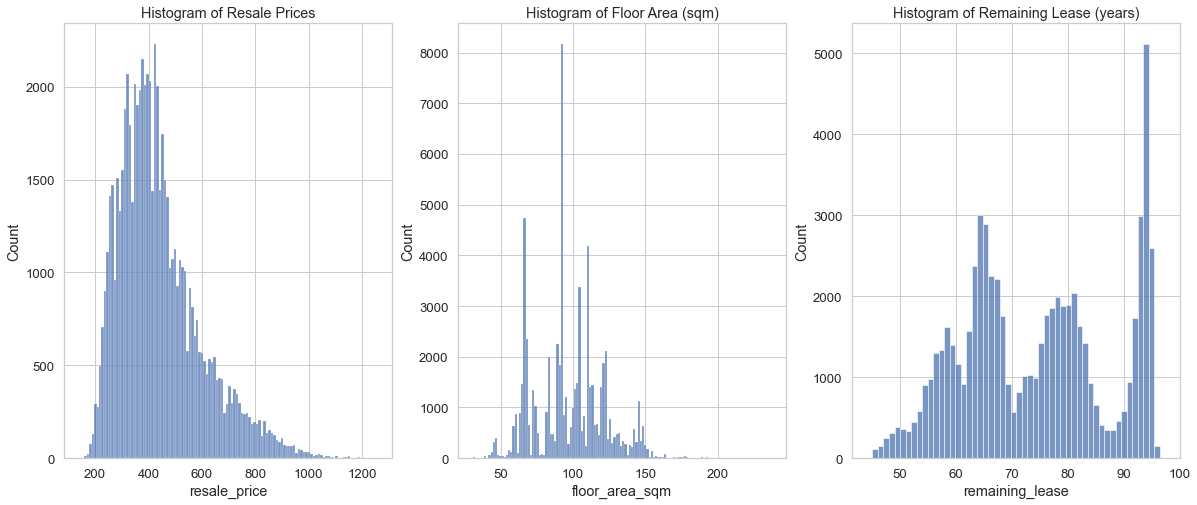

In [11]:
fig,ax = plt.subplots(1,3, figsize=(20,8))
sns.histplot(hdb_data_eda['resale_price'], ax=ax[0])
sns.histplot(hdb_data_eda['floor_area_sqm'], ax=ax[1])
sns.histplot(hdb_data_eda['remaining_lease'], ax=ax[2])
ax[0].title.set_text('Histogram of Resale Prices')
ax[1].title.set_text('Histogram of Floor Area (sqm)')
ax[2].title.set_text('Histogram of Remaining Lease (years)')
plt.show()

In all three distributions, we see that none of them resemble a normal distribution. For resale price, the distribution is skewed to the right, telling us that there is a significant number of HDBs sold at high prices. We will need to perform some transformation on the variable to make it normal for linear regression later. For floor area, the shape of the distribution is not surprising as floor area is standard among HDB designs. Lastly for remaining lease, the distribution seems to have 4 significant peaks at around 60 years, 67 years, 80 years and 94 years. The peak at 95 years is the highest, indicating that many Singaporeans choose to sell their BTOs after the Minimum Occupation Period of 5 years, perhaps to upgrade to private housing.

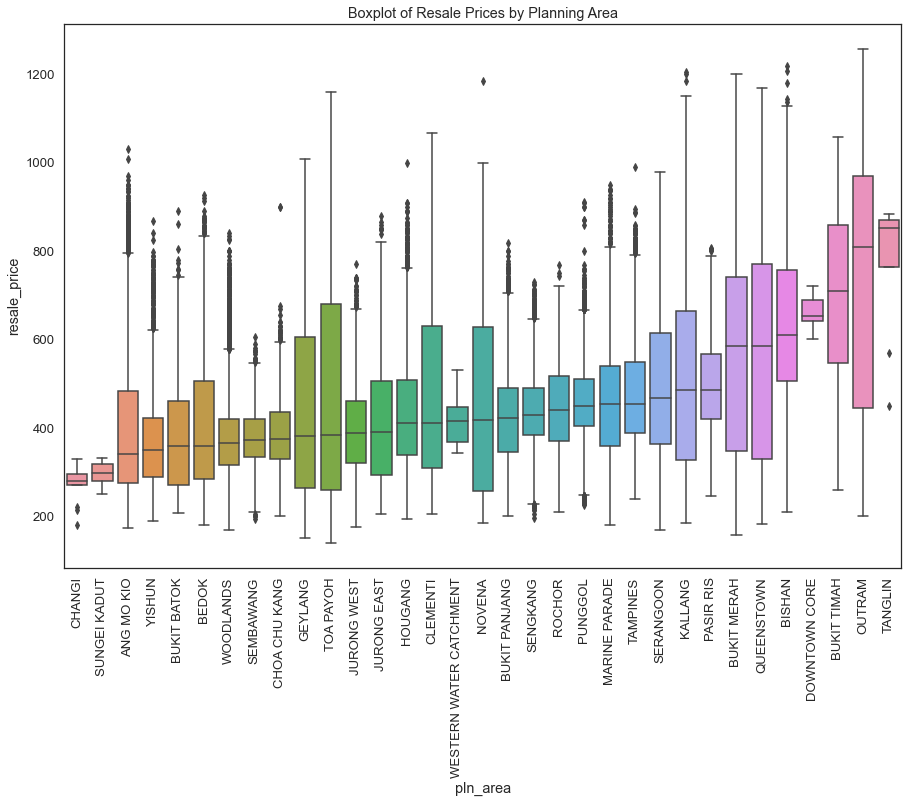

In [12]:
sns.set(font_scale=1.2, style='white')
ax = sns.boxplot(x=hdb_data_eda['pln_area'], y=hdb_data_eda['resale_price'],
                order=hdb_data_eda.groupby('pln_area')['resale_price'].median().sort_values().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.title.set_text('Boxplot of Resale Prices by Planning Area')
plt.show()

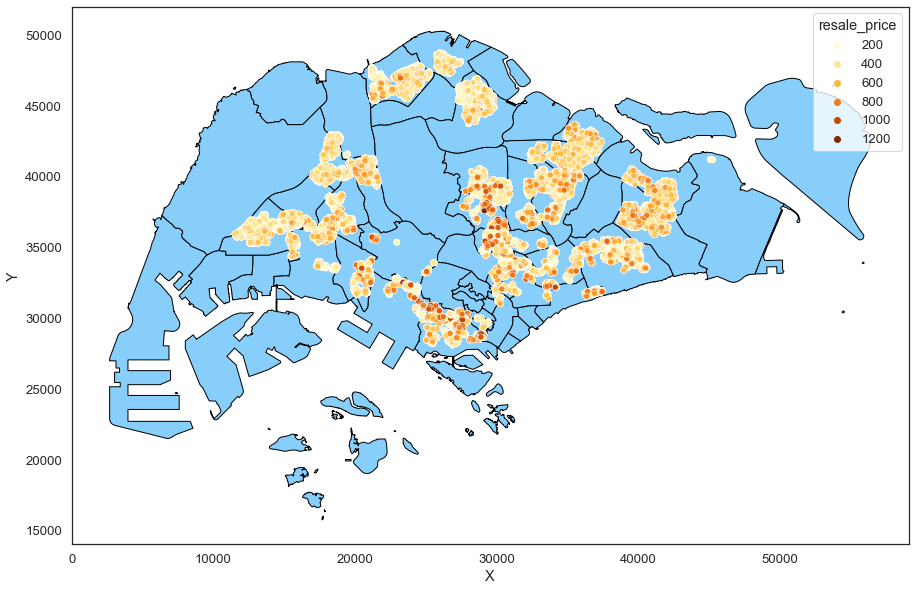

In [13]:
sg_map = gpd.read_file('/Users/zacharytang/Documents/OneDrive/Documents/Projects/Python/Data Analytics Portfolio/Machine Learning/HDB/SHP File/master-plan-2014-planning-area-boundary-no-sea-shp/MP14_PLNG_AREA_NO_SEA_PL.shp')
fig, ax = plt.subplots(figsize=(15,15))
sg_map.plot(ax=ax, color='lightskyblue', edgecolor='black')
sns.scatterplot(x=hdb_data_eda['X'], y=hdb_data_eda['Y'],
                hue=hdb_data_eda['resale_price'], palette='YlOrBr')
plt.show()

The visualisations above show the distribution of prices by planning areas and the geographic distribution of resale HDBs. We see the areas with higher resale HDB prices are located in the 'central region'. In the areas further from the central region like Woodlands and Jurong West, resale HDB prices are lower.

### **3.3 Relationships**

Now, lets explore the relationships between `resale_price`, `floor_area_sqm` and `remaining_lease` using a pairplot.

/Users/zacharytang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


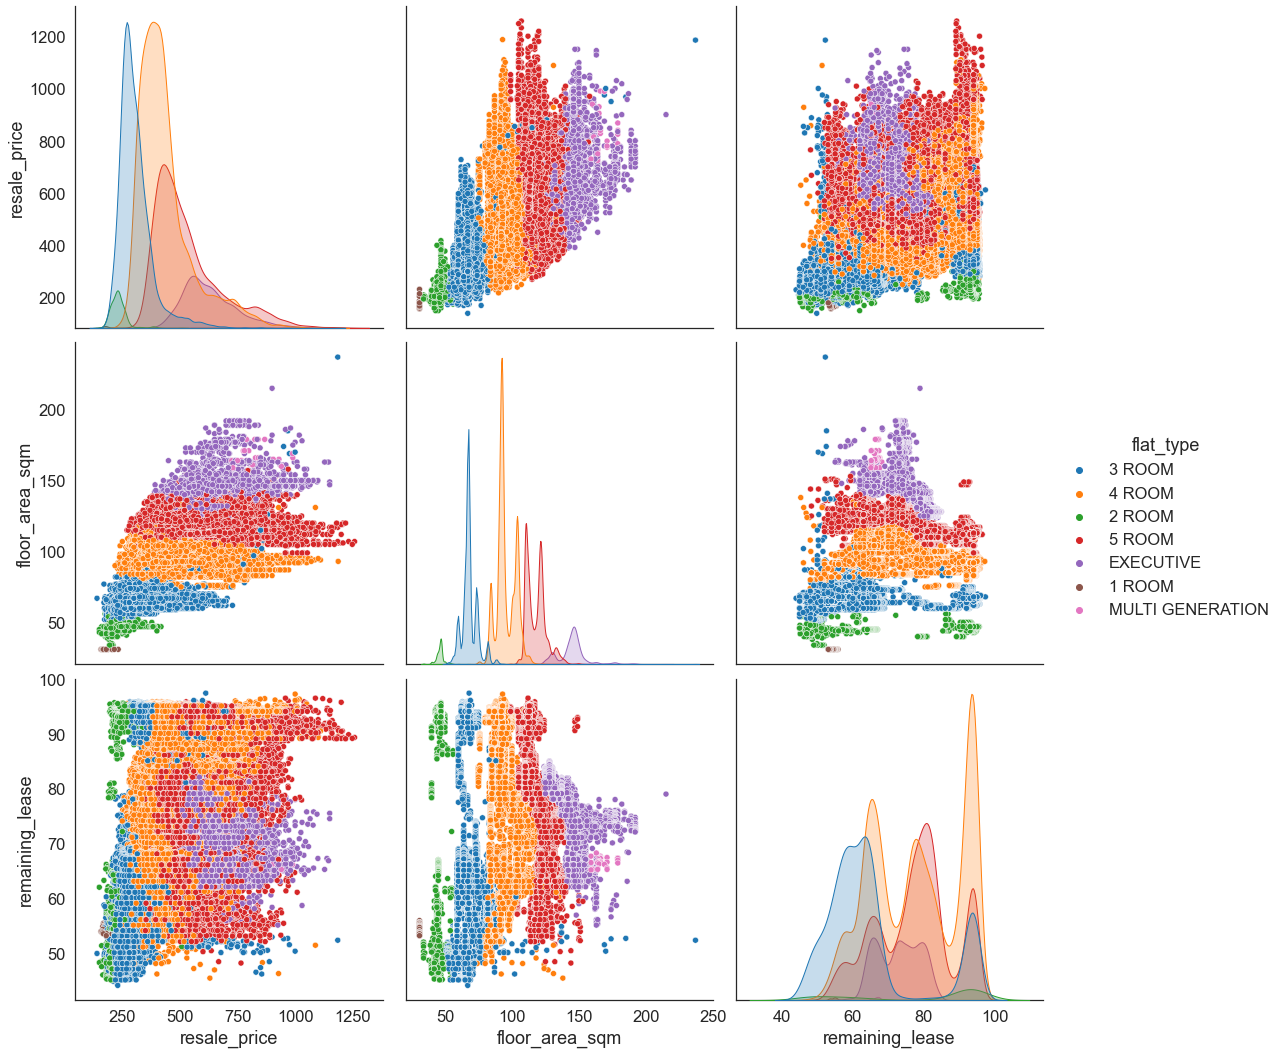

In [14]:
sns.set(font_scale=1.5, style='white')
sns.pairplot(data=hdb_data_eda[['resale_price','floor_area_sqm','remaining_lease','flat_type']],
             height=5, hue='flat_type', palette='tab10')
plt.show()

We a positive relationship between resale price and floor area, which is expected. The relationship also looks kind of exponential, so non-linearities could be explored later when we are training our models. For resale price and remaining lease, we also see a somewhat positive relationship, although it is not as prominent as the relationship between floor area and resale price.

It's obvious to us that floor area and remaining lease are not adequte enough to explain the variation in housing prices, so lets take a look at the relationships with geographical features with a correlation matrix.

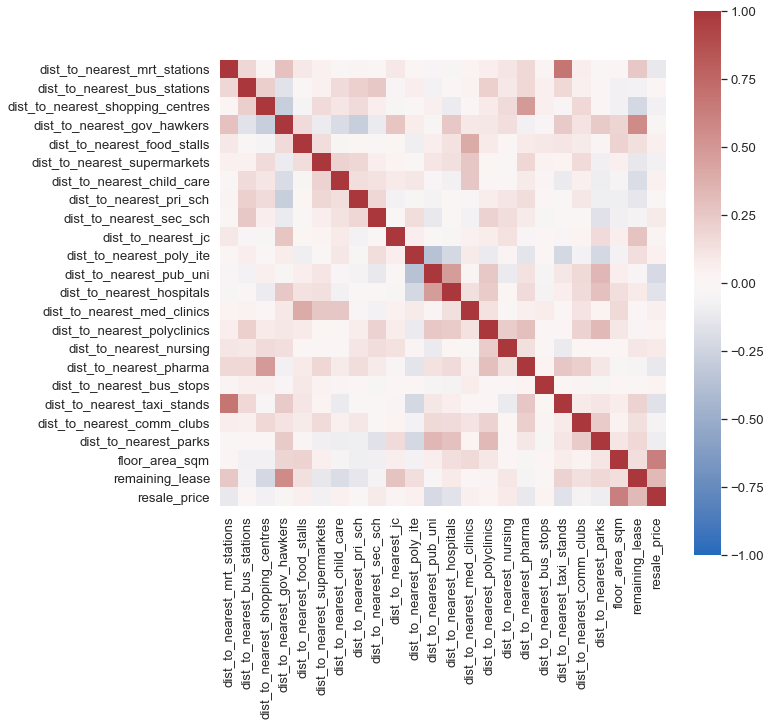

In [15]:
sns.set(font_scale=1.2, style='white')
fig = plt.figure(figsize=(10,10))
sns.heatmap(pd.concat([hdb_data_eda.loc[:,hdb_data_eda.columns.str.contains('dist_')],
                       hdb_data_eda[['floor_area_sqm', 'remaining_lease',
                                     'flat_type', 'resale_price']]],
                      axis=1).corr(), vmin=-1, vmax=1, cmap='vlag', square=True)
plt.show()

From the correlation matrix (focusing on `retail_price`), we see that `dist_to_nearest_pub_uni`, `dist_to_nearest_mrt_stations`, `dist_to_nearest_taxi_stands` and `dist_to_nearest_hospitals`, `dist_to_nearest_pharma` have negative correlation to resale prices. This is surprising, as we would not expect that the distance to nearest universities, hospitals and pharmacies would have a bigger relationship to resale prices compared to other features like shopping centres, parks and hawkers. Perhaps these features are highly collinear to the others, for example, we see a positive relationship between pharma and shopping centres, universities and hospitals etc. We would have to explore further when we are training our models.

## **4. Geographical Features**

Now let's take a deeper look into the geographical features of resale HDBs.

### **4.1 Mean & standard deviations**

In [16]:
hdb_data_eda.loc[:,hdb_data_eda.columns.str.contains('dist')].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
dist_to_nearest_mrt_stations,67092.0,0.798206,0.442549,1.586322e-02,0.472483,0.728952,1.023991,3.542279
dist_to_nearest_bus_stations,67092.0,1.190784,0.650239,3.234243e-02,0.708315,1.072612,1.539771,4.567195
dist_to_nearest_shopping_centres,67092.0,0.681625,0.400716,0.000000e+00,0.388234,0.606612,0.887333,3.205864
dist_to_nearest_gov_hawkers,67092.0,1.921530,1.699247,0.000000e+00,0.430689,1.435778,2.982172,6.115506
dist_to_nearest_food_stalls,67092.0,0.133311,0.071243,0.000000e+00,0.085627,0.127967,0.175855,0.589680
dist_to_nearest_supermarkets,67092.0,0.319095,0.189773,0.000000e+00,0.188032,0.288062,0.416447,3.355722
dist_to_nearest_child_care,67092.0,0.126486,0.103626,0.000000e+00,0.070088,0.113813,0.164527,2.961618
dist_to_nearest_pri_sch,67092.0,0.401807,0.237861,4.374491e-02,0.229274,0.357593,0.513493,3.332141
dist_to_nearest_sec_sch,67092.0,0.506039,0.294829,4.539808e-02,0.290600,0.450759,0.649917,3.668093
dist_to_nearest_jc,67092.0,2.681033,1.492029,1.216659e-01,1.386343,2.516602,3.906304,6.897234


Some points of interest in this table is that for an average resale HDB, you can amenties such as a shopping centre, food stall, supermarket, child care centre, pharmacy, clinic, community club and park within a 1km radius. For transportation, an average resale HDB is located about 800 metres away from the nearest MRT station and 100 metres away from the nearest bus stop, both are within reasonable walking distances.

### **4.2 Distributions**

#### **4.2.1 By Transport**

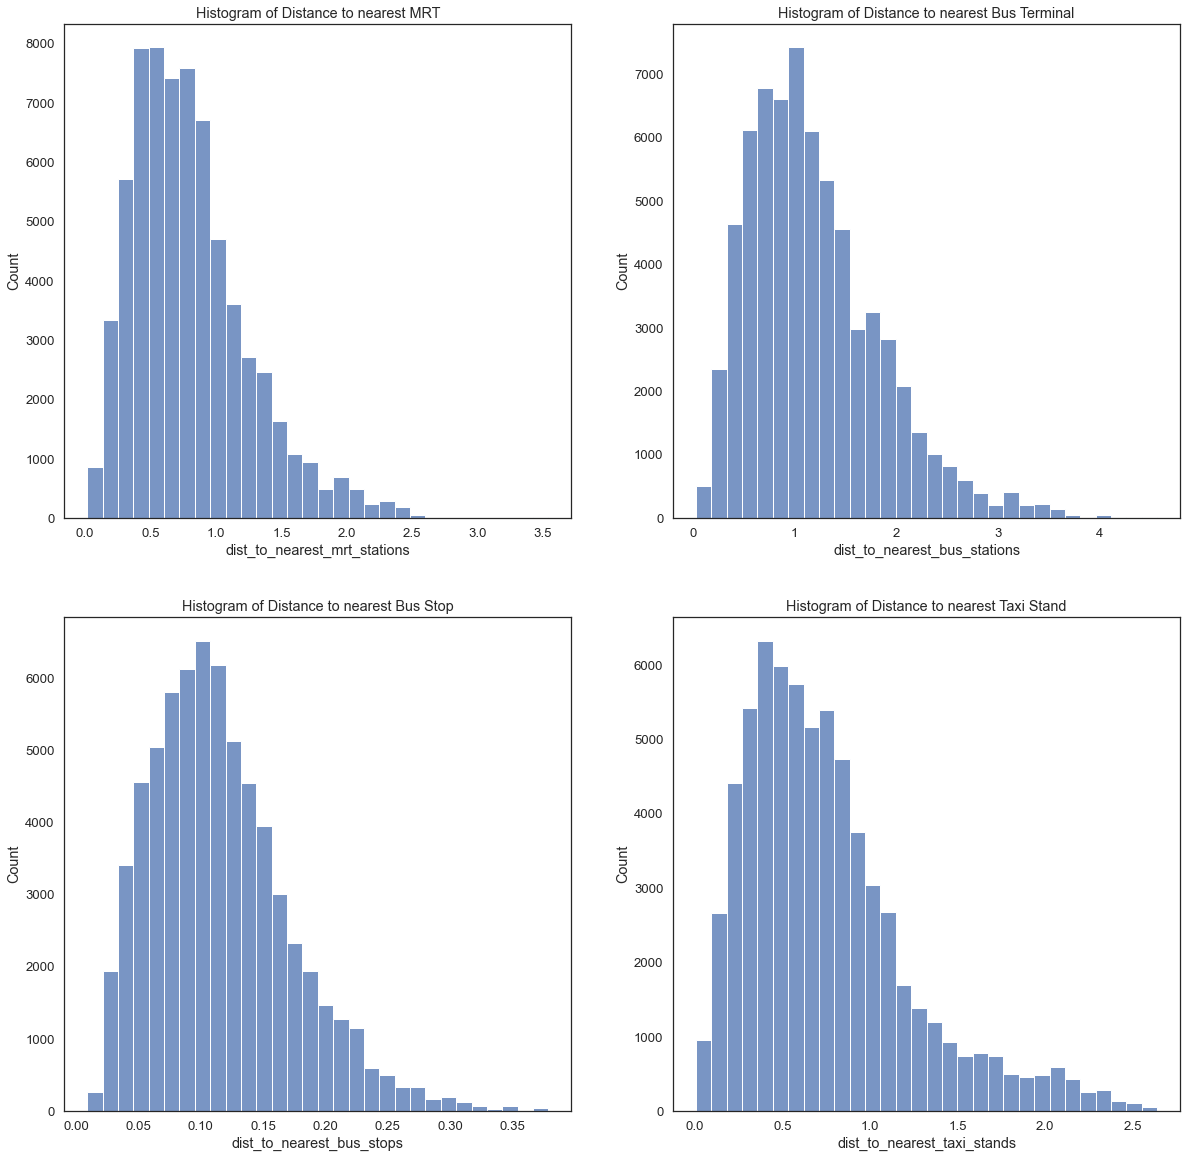

In [17]:
sns.set(font_scale=1.2, style='white')
fig,ax = plt.subplots(2,2, figsize=(20,20))
sns.histplot(hdb_data_eda['dist_to_nearest_mrt_stations'], ax=ax[0,0], bins=30)
sns.histplot(hdb_data_eda['dist_to_nearest_bus_stations'], ax=ax[0,1], bins=30)
sns.histplot(hdb_data_eda['dist_to_nearest_bus_stops'], ax=ax[1,0], bins=30)
sns.histplot(hdb_data_eda['dist_to_nearest_taxi_stands'], ax=ax[1,1], bins=30)
ax[0,0].title.set_text('Histogram of Distance to nearest MRT')
ax[0,1].title.set_text('Histogram of Distance to nearest Bus Terminal')
ax[1,0].title.set_text('Histogram of Distance to nearest Bus Stop')
ax[1,1].title.set_text('Histogram of Distance to nearest Taxi Stand')
plt.show()

Looking at the distributions for transportation features, we see that all 4 distributions seem right skewed. Bus stations are on average located further from a resale HDB compared to the others. For bus stops, we see that the range of distances are rather short. Lastly for MRT stations and taxi stands, we see that the distributions are somewhat similar, telling us that these two transporation amenities are usually located near each other.

#### **4.2.2 By Amenities**

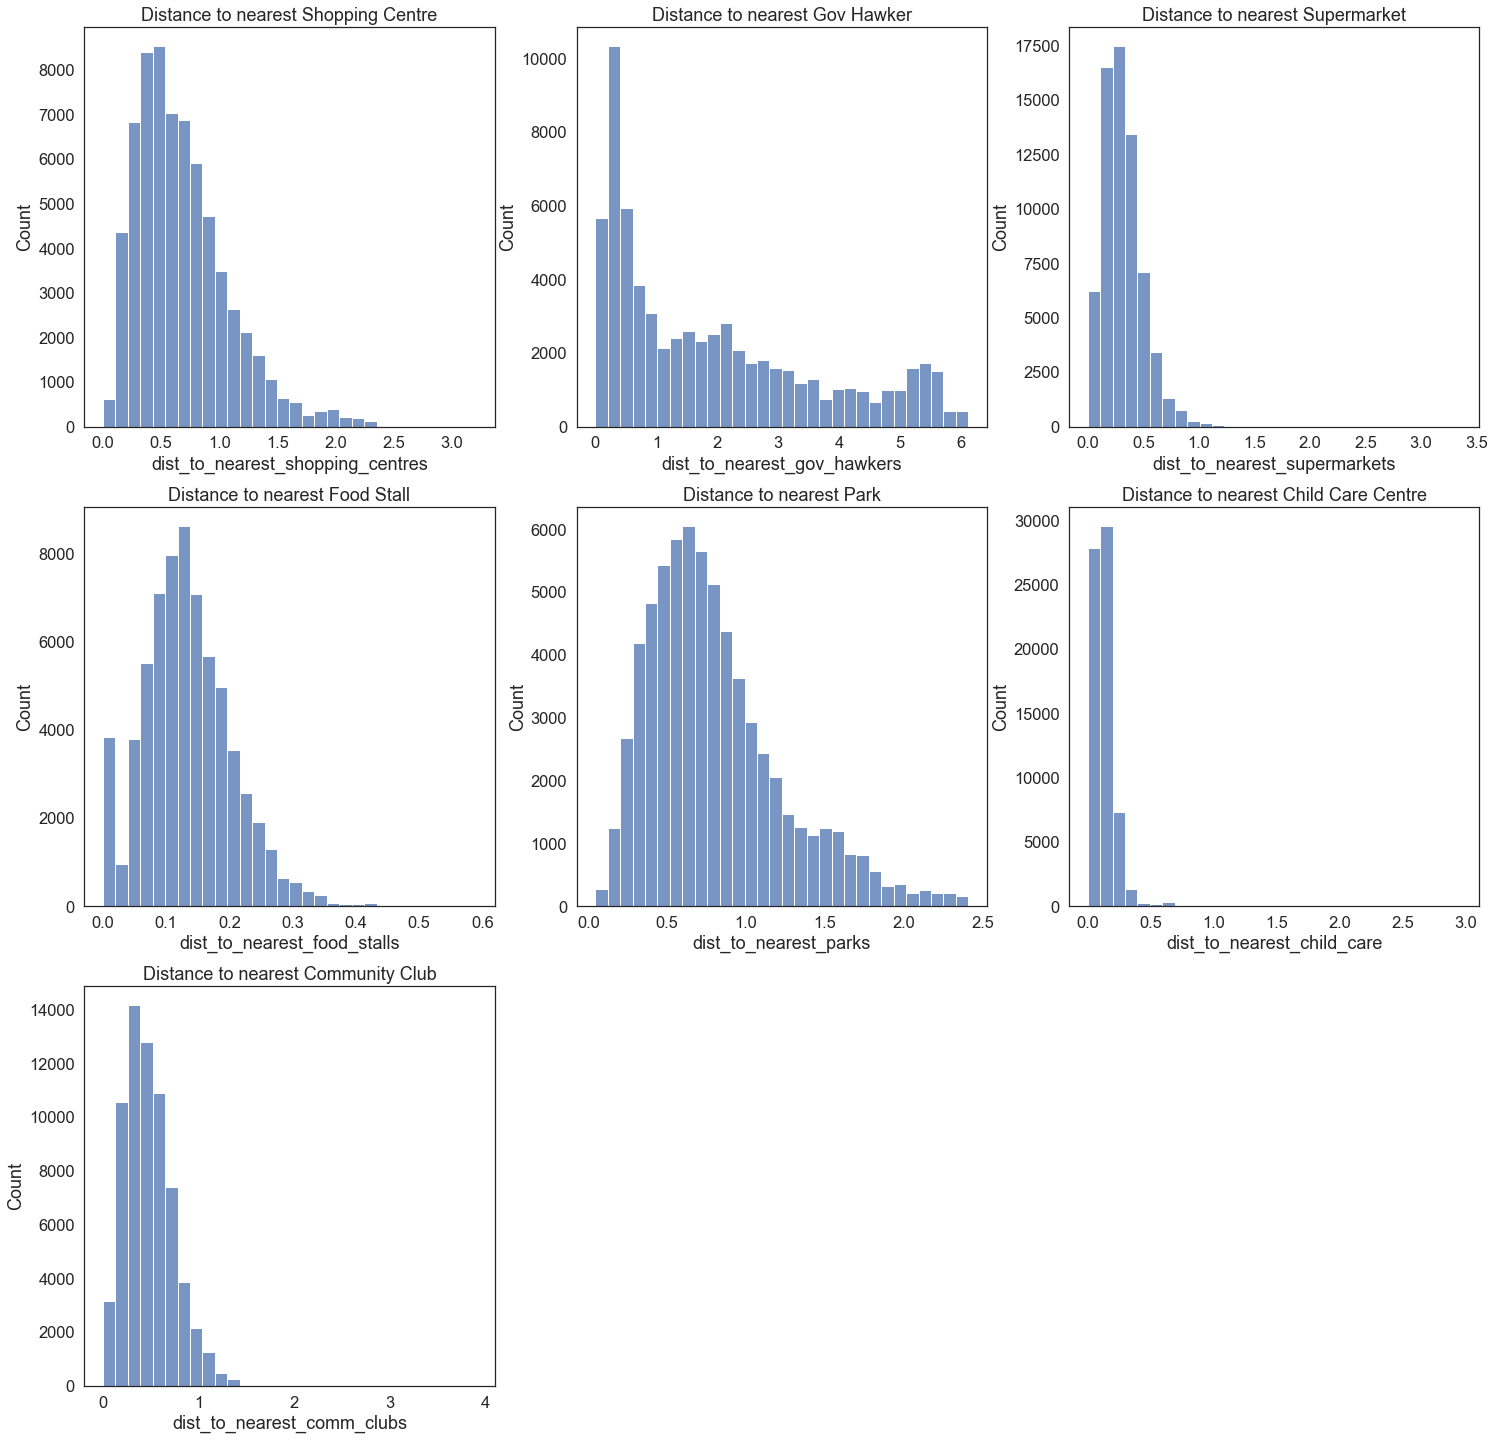

In [18]:
sns.set(font_scale=1.5, style='white')
fig,ax = plt.subplots(3,3, figsize=(25,25))
sns.histplot(hdb_data_eda['dist_to_nearest_shopping_centres'], ax=ax[0,0], bins=30)
sns.histplot(hdb_data_eda['dist_to_nearest_gov_hawkers'], ax=ax[0,1], bins=30)
sns.histplot(hdb_data_eda['dist_to_nearest_supermarkets'], ax=ax[0,2], bins=30)
sns.histplot(hdb_data_eda['dist_to_nearest_food_stalls'], ax=ax[1,0], bins=30)
sns.histplot(hdb_data_eda['dist_to_nearest_parks'], ax=ax[1,1], bins=30)
sns.histplot(hdb_data_eda['dist_to_nearest_child_care'], ax=ax[1,2], bins=30)
sns.histplot(hdb_data_eda['dist_to_nearest_comm_clubs'], ax=ax[2,0], bins=30)
ax[0,0].title.set_text('Distance to nearest Shopping Centre')
ax[0,1].title.set_text('Distance to nearest Gov Hawker')
ax[0,2].title.set_text('Distance to nearest Supermarket')
ax[1,0].title.set_text('Distance to nearest Food Stall')
ax[1,1].title.set_text('Distance to nearest Park')
ax[1,2].title.set_text('Distance to nearest Child Care Centre')
ax[2,0].title.set_text('Distance to nearest Community Club')
ax[2,1].axis('off')
ax[2,2].axis('off')
plt.show()

Focusing now on amenities, we see that the distribution of distances to the nearest government hawker looks highly right skewed and the range of distances is wide. For supermarkets, food stalls, child care centres and community clubs, we see that the range of distances is relatively narrow, indicating that these amenities commonly found within the vicinity of a average resale HDB.

#### **4.2.3 By Educational Institutions**

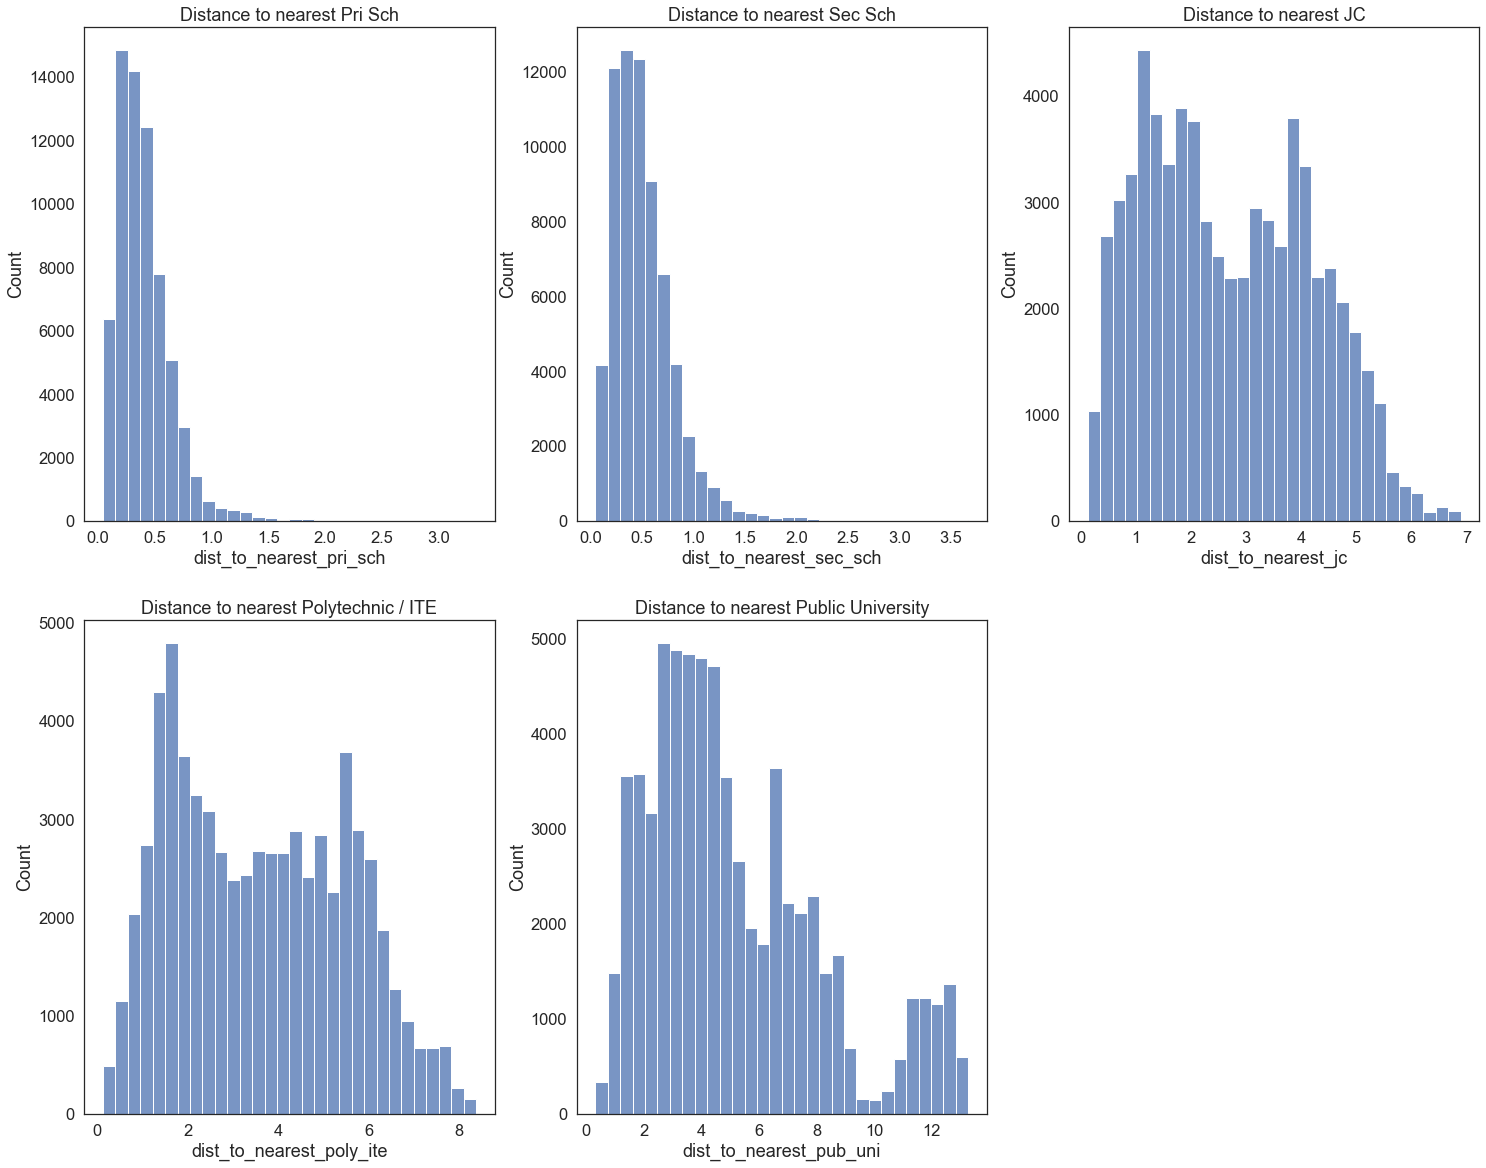

In [19]:
sns.set(font_scale=1.5, style='white')
fig,ax = plt.subplots(2,3, figsize=(25,20))
sns.histplot(hdb_data_eda['dist_to_nearest_pri_sch'], ax=ax[0,0], bins=30)
sns.histplot(hdb_data_eda['dist_to_nearest_sec_sch'], ax=ax[0,1], bins=30)
sns.histplot(hdb_data_eda['dist_to_nearest_jc'], ax=ax[0,2], bins=30)
sns.histplot(hdb_data_eda['dist_to_nearest_poly_ite'], ax=ax[1,0], bins=30)
sns.histplot(hdb_data_eda['dist_to_nearest_pub_uni'], ax=ax[1,1], bins=30)
ax[0,0].title.set_text('Distance to nearest Pri Sch')
ax[0,1].title.set_text('Distance to nearest Sec Sch')
ax[0,2].title.set_text('Distance to nearest JC')
ax[1,0].title.set_text('Distance to nearest Polytechnic / ITE')
ax[1,1].title.set_text('Distance to nearest Public University')
ax[1,2].axis('off')
plt.show()

Looking now at educational institutions, we observe that primary schools and secondary schools are on average located less than 1km away from a resale HDB. This is interesting as it tells us that on average, a child is able to walk to their primary/secondary school. An interesting question to explore later when building our models is whether being located near a top school has a positive effect on prices. For tertiary education like junior colleges, polytechnics, ITEs and universities, we see that the average distances are all quite high. Compared to primary and secondary schools, there are lesser tertiary institutions, so this observation is expected.

#### **4.2.4 By Medical Institutions**

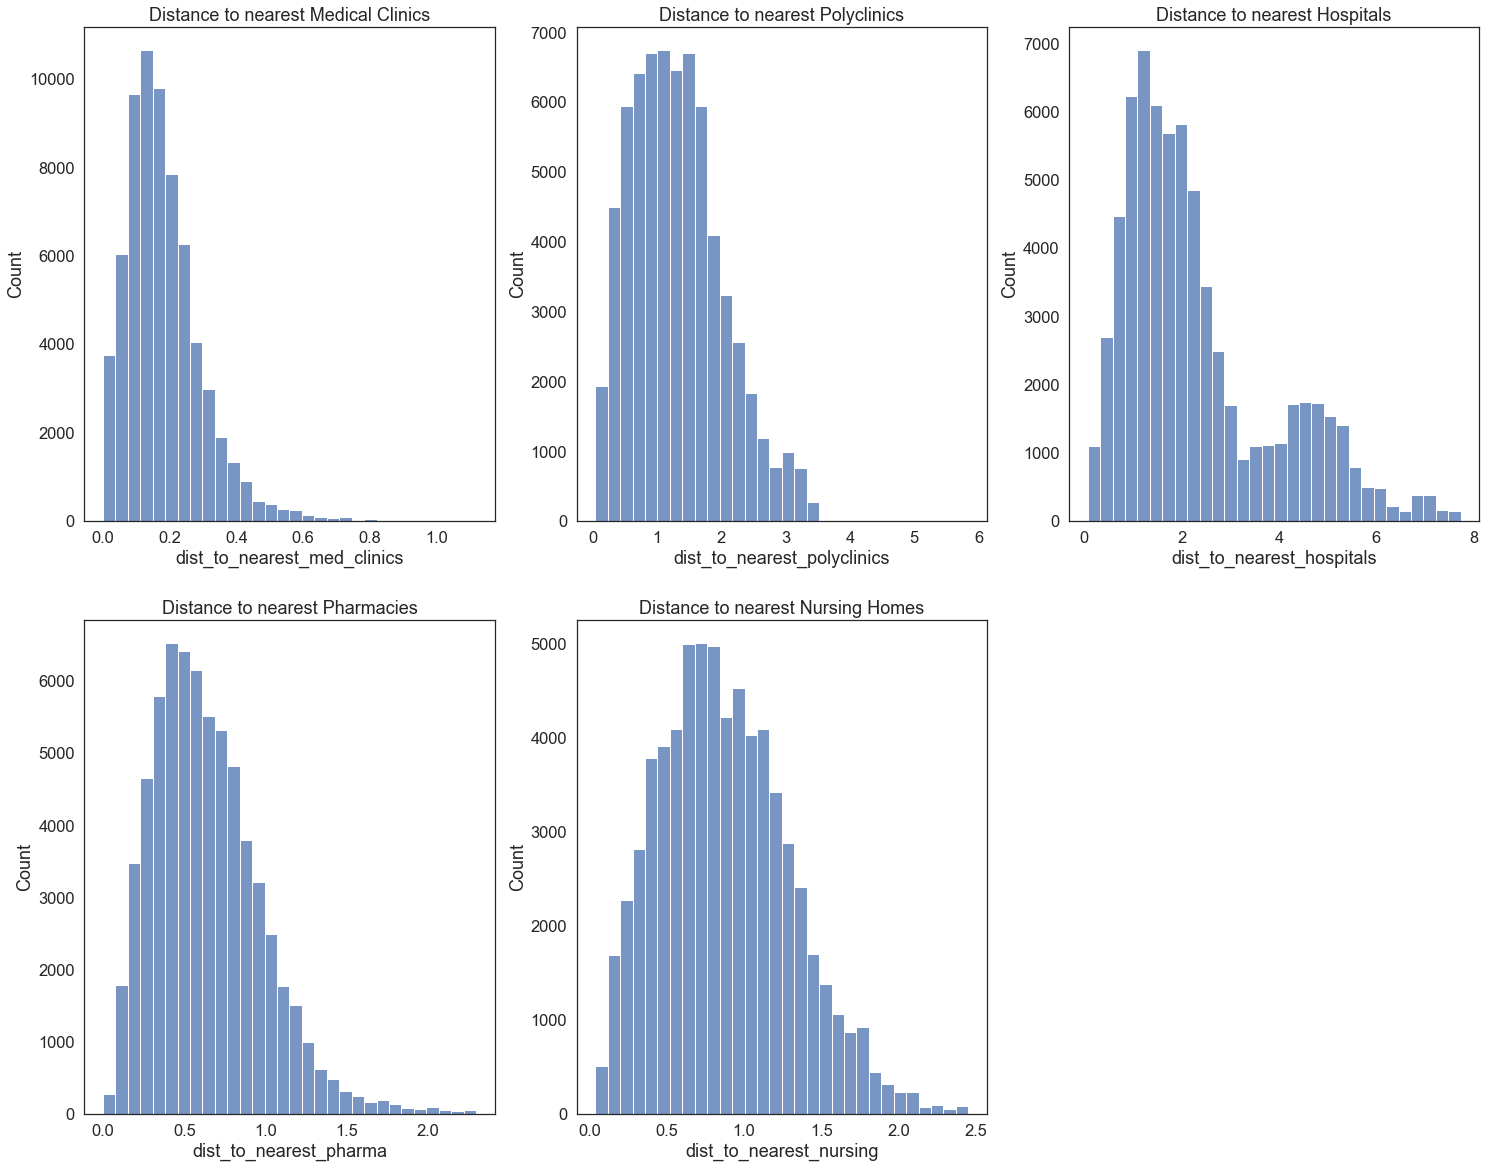

In [20]:
sns.set(font_scale=1.5, style='white')
fig,ax = plt.subplots(2,3, figsize=(25,20))
sns.histplot(hdb_data_eda['dist_to_nearest_med_clinics'], ax=ax[0,0], bins=30)
sns.histplot(hdb_data_eda['dist_to_nearest_polyclinics'], ax=ax[0,1], bins=30)
sns.histplot(hdb_data_eda['dist_to_nearest_hospitals'], ax=ax[0,2], bins=30)
sns.histplot(hdb_data_eda['dist_to_nearest_pharma'], ax=ax[1,0], bins=30)
sns.histplot(hdb_data_eda['dist_to_nearest_nursing'], ax=ax[1,1], bins=30)
ax[0,0].title.set_text('Distance to nearest Medical Clinics')
ax[0,1].title.set_text('Distance to nearest Polyclinics')
ax[0,2].title.set_text('Distance to nearest Hospitals')
ax[1,0].title.set_text('Distance to nearest Pharmacies')
ax[1,1].title.set_text('Distance to nearest Nursing Homes')
ax[1,2].axis('off')
plt.show()

Lastly for medical amenities, we see that the average distances to the nearest clinic, pharmacy and nursing home are small. For hospitals and polyclinics, since there are only a handful of these facilities in Singapore, their average distances are higher.

**To conclude this section,** we gained insight into the commonly found amenties near an average resale HDB. In Part III of this project, we use statistical and machine learning methods to see if these features have an effect on resale HDB prices.

### **4.3 Planning Area**

In this section, we explore the 22 planning areas of Singapore. Planning areas are the main urban planning and census divisions of Singapore, delineated by the Urban Redevelopment Authority. Each area also acts as boundaries for administrative purposes, such as police force and town council jurisdictions.

#### **4.3.1 Number of HDBs sold by Planning Area**

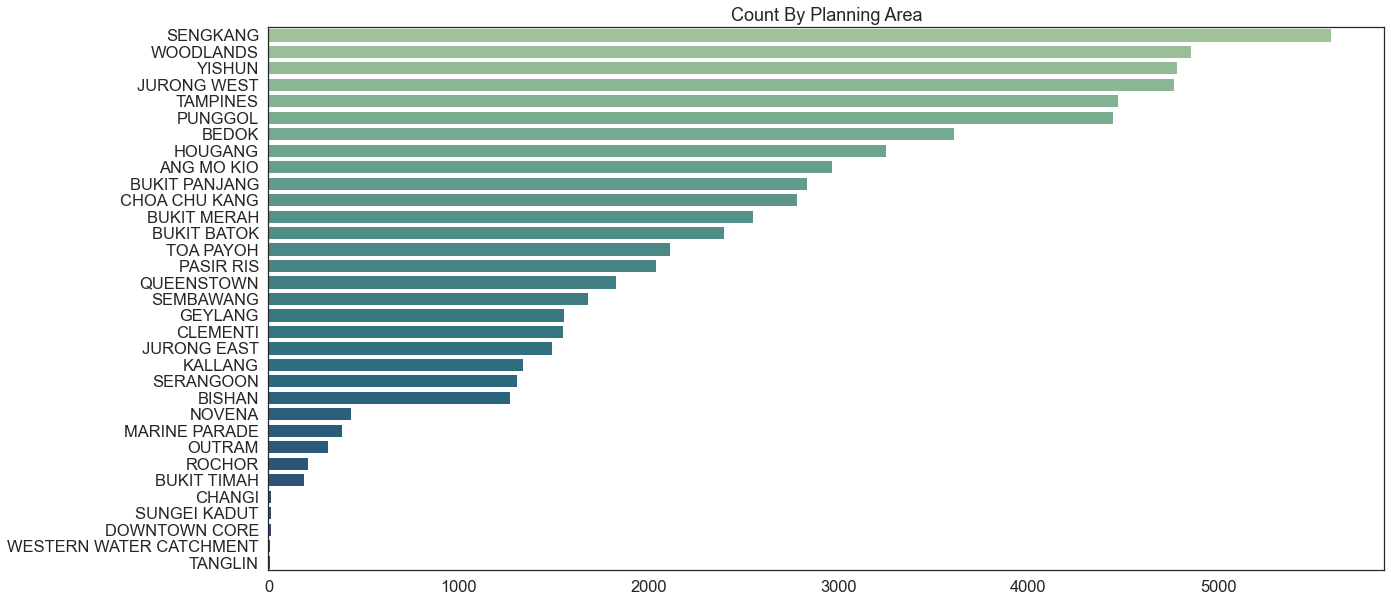

In [21]:
sns.set(font_scale=1.5, style='white')
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x=hdb_data_eda['pln_area'].value_counts().values,y=hdb_data_eda['pln_area'].value_counts().index,
            ax=ax, palette='crest')
ax.title.set_text('Count By Planning Area')
plt.show()

From the bar plot above, we see that the northern regions have a high number of resale HDB transactions. A potential explanation for this observation is that these areas are less mature and there are a high number of Build-to-order projects located there. On the other end of the spectrum, we that planning areas located in the central region like Novena, Bukit Timah and so on, have a low number of resale HDB transactions, likely due to the fact that these areas comprise of mostly private residences.

#### **4.3.2 Average Price by Planning Area**

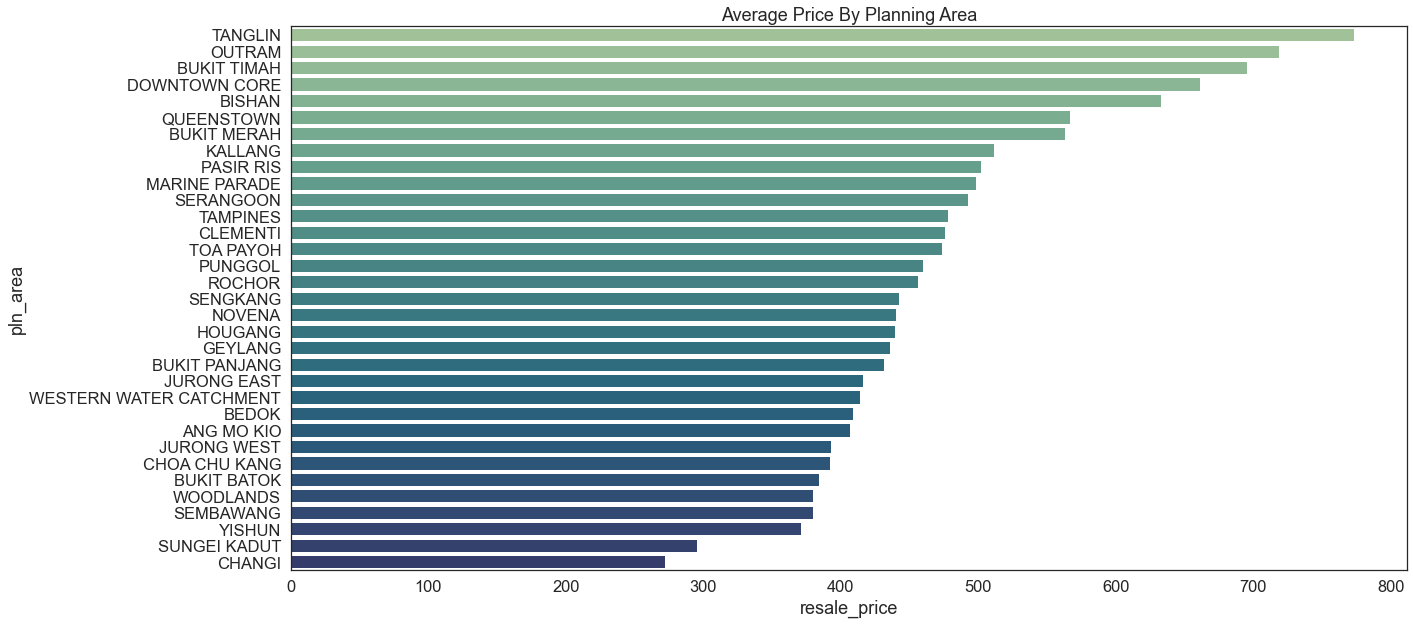

In [22]:
sns.set(font_scale=1.5, style='white')
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x=hdb_data_eda.groupby('pln_area')['resale_price'].mean().sort_values(ascending=False),
            y=hdb_data_eda.groupby('pln_area')['resale_price'].mean().sort_values(ascending=False).index,
            ax=ax, palette='crest')
ax.title.set_text('Average Price By Planning Area')
plt.show()

Looking at average resale HDB prices by planning area, we observe that central regions, to no surprise, have higher average resale prices. Areas like Queenstown and Bishan are mature areas, so prices here are quite high on average too. Look at the other end, we see that areas located in the north have lower average prices. 

#### **4.3.3 Remaining Lease by Planning Area**

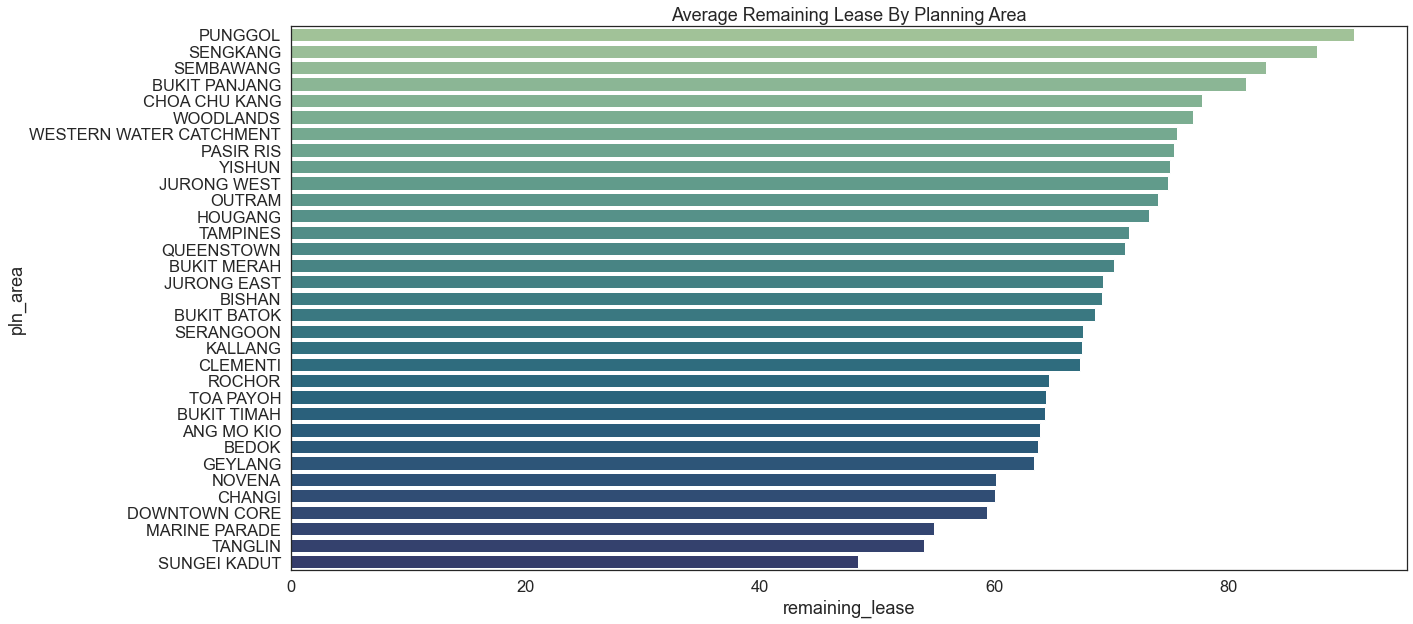

In [23]:
sns.set(font_scale=1.5, style='white')
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x=hdb_data_eda.groupby('pln_area')['remaining_lease'].mean().sort_values(ascending=False),
            y=hdb_data_eda.groupby('pln_area')['remaining_lease'].mean().sort_values(ascending=False).index,
            ax=ax, palette='crest')
ax.title.set_text('Average Remaining Lease By Planning Area')
plt.show()

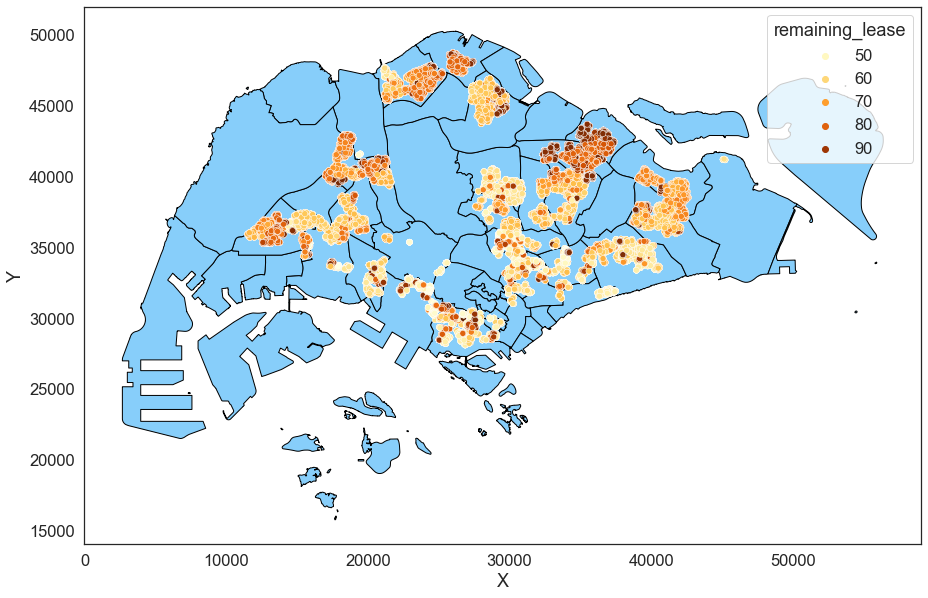

In [24]:
fig, ax = plt.subplots(figsize=(15,15))
sg_map.plot(ax=ax, color='lightskyblue', edgecolor='black')
sns.scatterplot(x=hdb_data_eda['X'], y=hdb_data_eda['Y'],
                hue=hdb_data_eda['remaining_lease'], palette='YlOrBr')
plt.show()

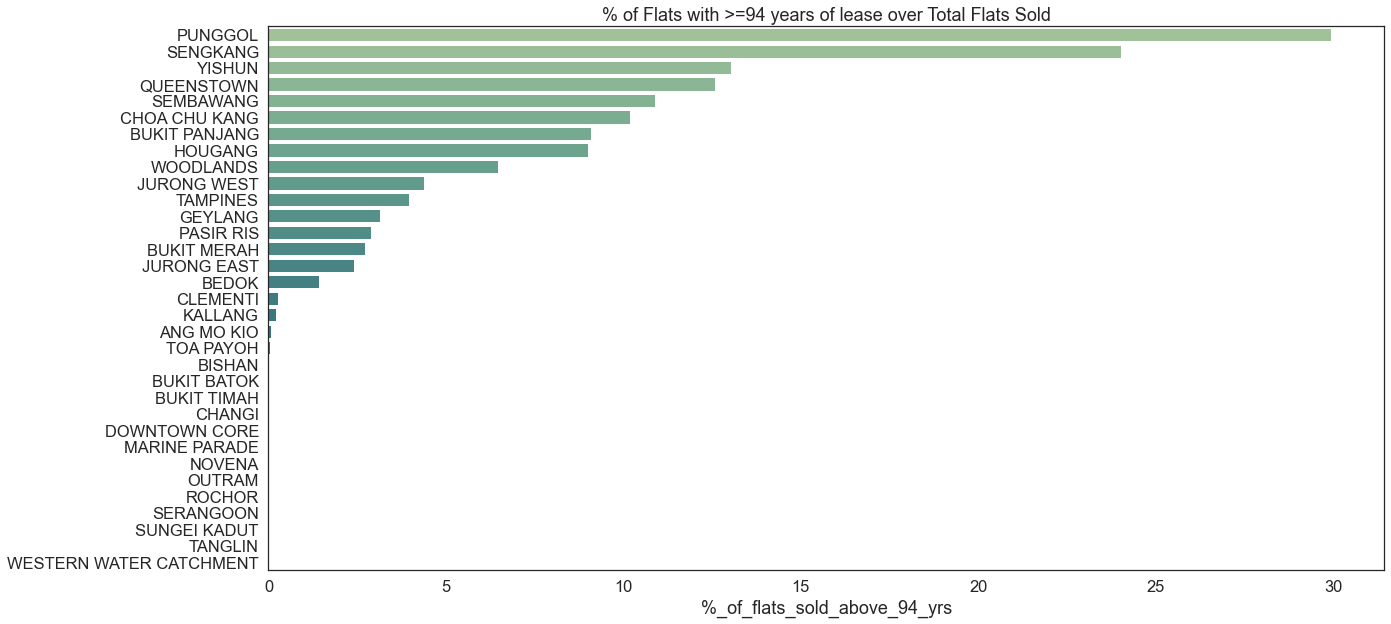

In [25]:
series1 = hdb_data_eda.loc[hdb_data_eda['remaining_lease'] >= 94].groupby('pln_area')['remaining_lease'].count()
series2 = hdb_data_eda.groupby('pln_area')['remaining_lease'].count()
lease_df = pd.concat([series1, series2], axis=1)
lease_df['%_of_flats_sold_above_94_yrs'] = (lease_df.iloc[:,0] / lease_df.iloc[:,1]) * 100

sns.set(font_scale=1.5, style='white')
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x=lease_df['%_of_flats_sold_above_94_yrs'].sort_values(ascending=False),
            y=lease_df['%_of_flats_sold_above_94_yrs'].sort_values(ascending=False).index,
            ax=ax, palette='crest')
ax.title.set_text('% of Flats with >=94 years of lease over Total Flats Sold')
plt.show()

Looking at the charts above, we see that indeed many HDB owners are selling off their build-to-order (BTOs) flats when the minimum occupation period (MOP) of 5 years has expired. Areas like Punggol and Sengkang have a high percentage of flats sold with more than 94 years in remaining lease. An interesting question to ask here is whether the BTO flat owners profit when they sell soon after the MOP. Another observation is that the central areas have rather low average remaining lease and high prices (as observed earlier). This tells us that some buyers care alot about the location and are willing to pay high prices even if the HDB is old.  

#### **4.3.4 Average Resale Price by Planning Area and Flat Type**

In the table below, we explore the average resale price by planning area and flat type.

In [26]:
pd.pivot_table(hdb_data_eda, values='resale_price', index='pln_area',
               columns=['flat_type'], aggfunc=np.mean)

flat_type,1 ROOM,2 ROOM,3 ROOM,4 ROOM,5 ROOM,EXECUTIVE,MULTI GENERATION
pln_area,,,,,,,
ANG MO KIO,NaN,204.173913,290.891745,461.216175,674.707647,814.232762,NaN
BEDOK,NaN,216.038333,289.734706,435.086628,580.546809,711.277724,NaN
BISHAN,NaN,NaN,352.934281,551.463756,756.757390,894.937714,920.777600
BUKIT BATOK,NaN,NaN,259.298775,371.846217,516.232197,611.299312,NaN
BUKIT MERAH,179.708933,244.427341,372.192372,652.321806,769.404762,NaN,NaN
BUKIT PANJANG,NaN,231.985520,299.511210,397.212578,492.740115,597.960070,NaN
BUKIT TIMAH,NaN,NaN,409.047200,642.139731,819.411902,955.362526,NaN
CHANGI,NaN,NaN,272.050000,NaN,NaN,NaN,NaN
CHOA CHU KANG,NaN,228.372414,289.923561,351.142258,421.152789,531.270991,NaN


For all planning areas, we see that as the flat type increases (i.e. 1-room to 2-room), the average price increases as well. 

## **5. Resale HDB Market Trends**

In this section, we will explore the trends in the resale HDB market.

### **5.1 Resale HDB Market Overview**

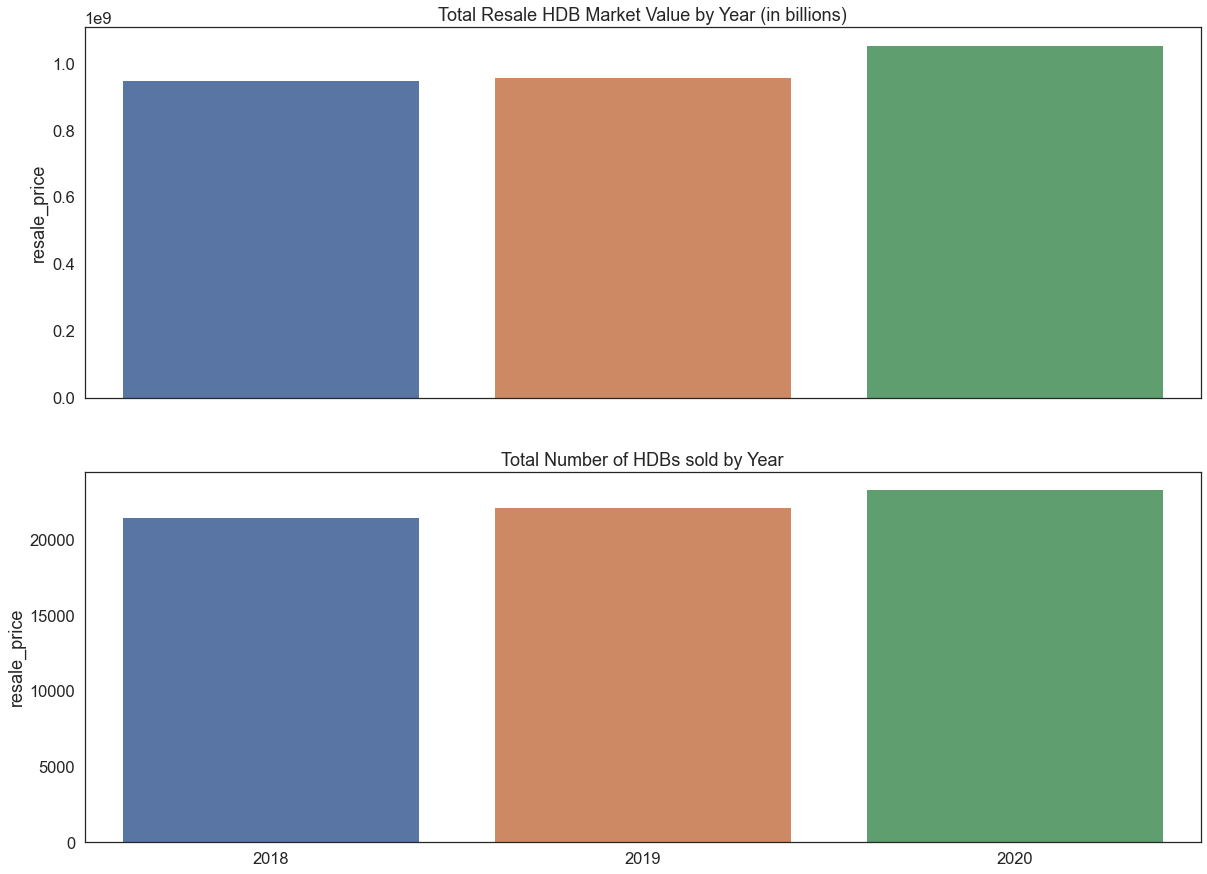

In [27]:
sns.set(font_scale=1.5, style='white')
fig, ax = plt.subplots(2,1, figsize=(20,15), sharex=True)
sns.barplot(x=hdb_data_eda.groupby(hdb_data_eda.index.year)['resale_price'].sum().index,
            y=hdb_data_eda.groupby(hdb_data_eda.index.year)['resale_price'].sum()*100,
            ax=ax[0])
sns.barplot(x=hdb_data_eda.groupby(hdb_data_eda.index.year)['resale_price'].count().index,
            y=hdb_data_eda.groupby(hdb_data_eda.index.year)['resale_price'].count(),
            ax=ax[1])
ax[0].title.set_text('Total Resale HDB Market Value by Year (in billions)')
ax[1].title.set_text('Total Number of HDBs sold by Year')
ax[0].set(xlabel='')
ax[1].set(xlabel='')
plt.show()

Referencing the charts above, we see that the total resale HDB market (in prices and quantity) has grown from 2018 - 2020. As of 2020, the resale HDB market is worth about 1 billion Singapore dollars. This is already surprising to us, since the COVID-19 in 2020 pandemic seems to have an insignificant effect of the resale market.

### **5.2 Total Resale Market Value Trend**

To further examine the trend in total resale HDB market value, we plot a time series below:

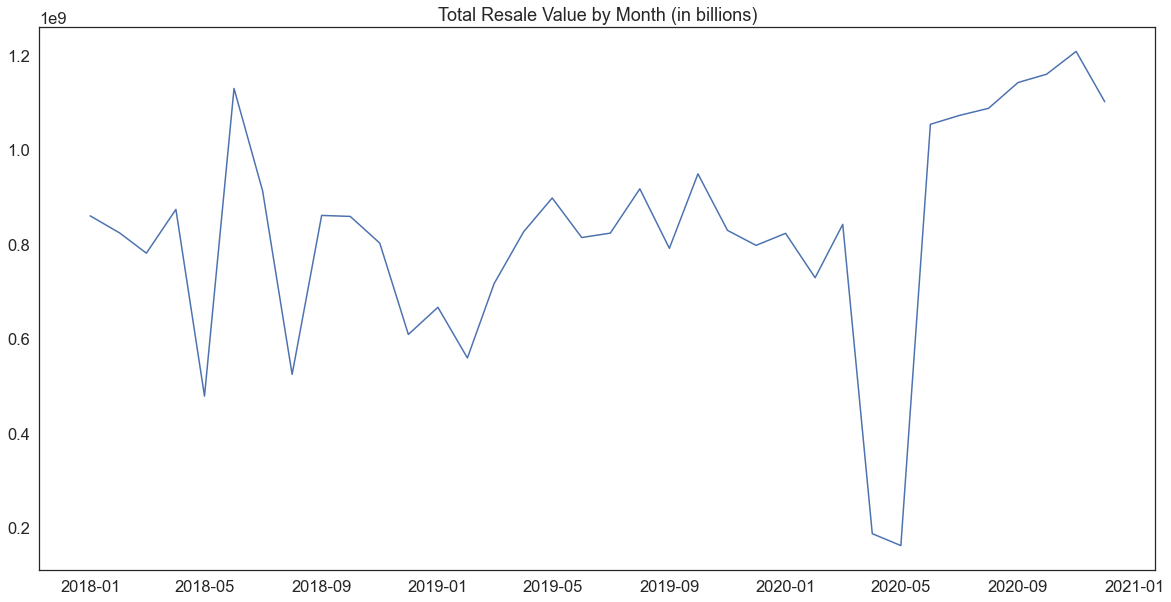

In [28]:
sns.set(font_scale=1.5, style='white')
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x=hdb_data_eda.index.unique().values,
             y=hdb_data_eda.groupby(hdb_data_eda.index)['resale_price'].sum().values*1000)
ax.title.set_text("Total Resale Value by Month (in billions)")
plt.show()

From the time series, we see that the total value seem to stagnate from 2018 to 2020, before taking a deep plunge in May 2020. This is due to the Circuit Breaker, a soft lock down which was imposed in Singapore to fight the pandemic. Immediately after the Circuit Breaker, we see that the resale HDB market value recovered sharply and is now around the 3-year all time high.

Now, lets try to decompose the time series into its individual components. 

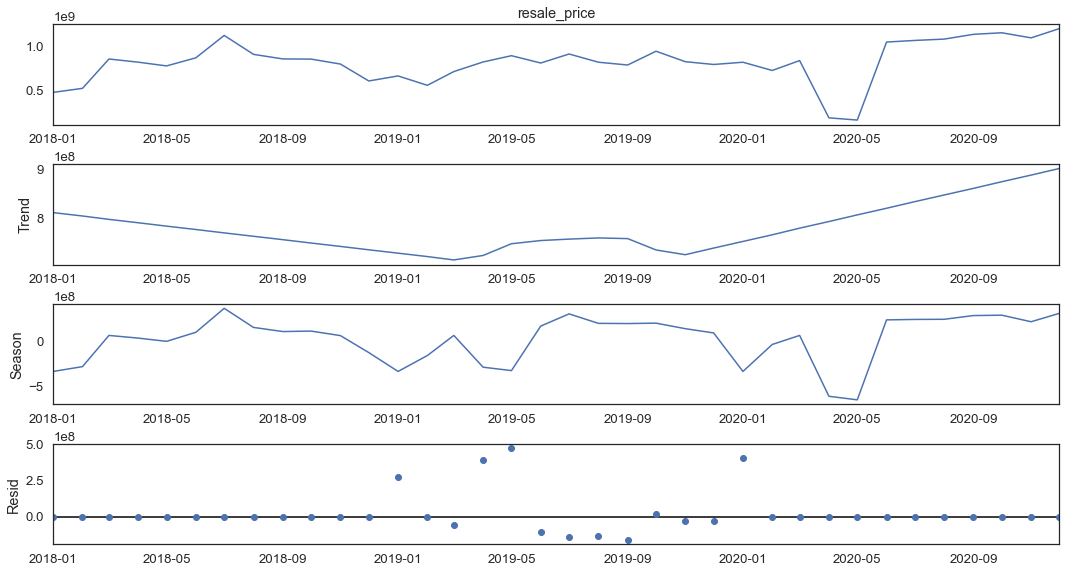

In [29]:
from statsmodels.tsa.seasonal import STL
sns.set(font_scale=1.2, style='white')
stl = STL(hdb_data_eda.groupby(hdb_data_eda.index)['resale_price'].sum()*1000, robust=True).fit()
fig = stl.plot()
fig.set_size_inches(15, 8)

Here we can see that there is no significant seasonality in the resale HDB market and the trend within 2018-2020 seems like a U-shape. 

### **5.3 Average Resale Price Trend of Total Market**

Looking at the total value of resale HDBs may not indicate the actual trends in values well. Let us now look at the evolution of average resale HDB prices instead.

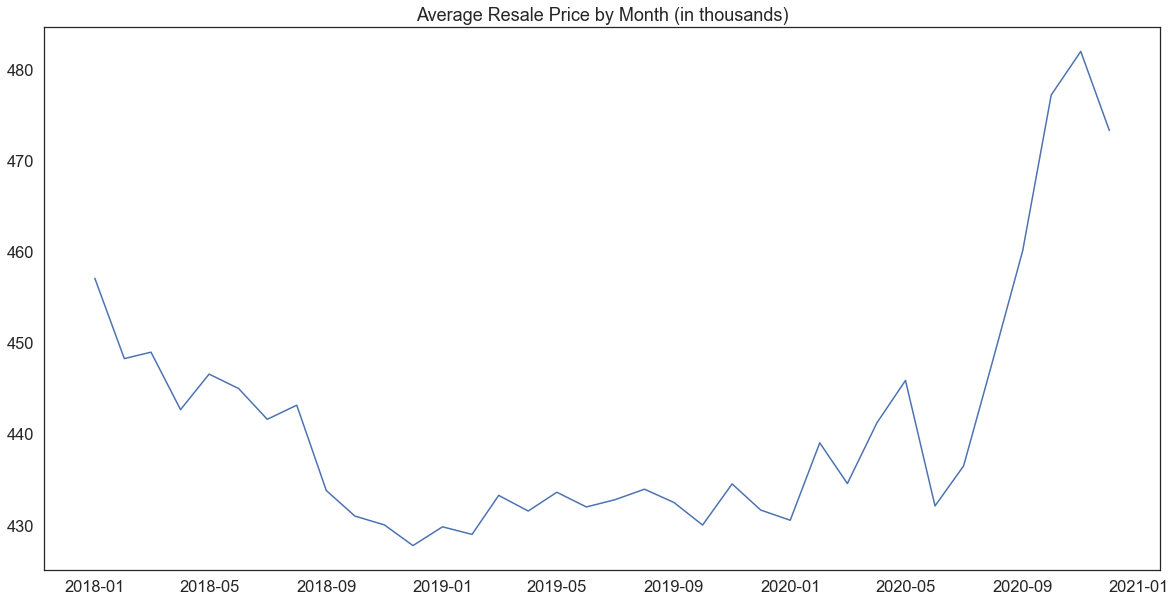

In [30]:
sns.set(font_scale=1.5, style='white')
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x=hdb_data_eda.index.unique().values,
             y=hdb_data_eda.groupby(hdb_data_eda.index)['resale_price'].mean().values)
ax.title.set_text('Average Resale Price by Month (in thousands)')
plt.show()

Here we can observe a strong U-shape trend. Average resale HDB prices decreased for the most part of 2018, possibly due to the cooling measures imposed by the government. We then see average prices stay stagnant until mid-2020. From mid-2020, we see a sharp increase in the average prices. It would be interesting to investigate the drivers of this sharp increase.

### **5.4 Trend of Average Resale Price for the Top 5 Planning Areas (By Market Value)**

In this subsection, we examine the trend in average resale prices by looking at the top 5 planning areas by total market value.

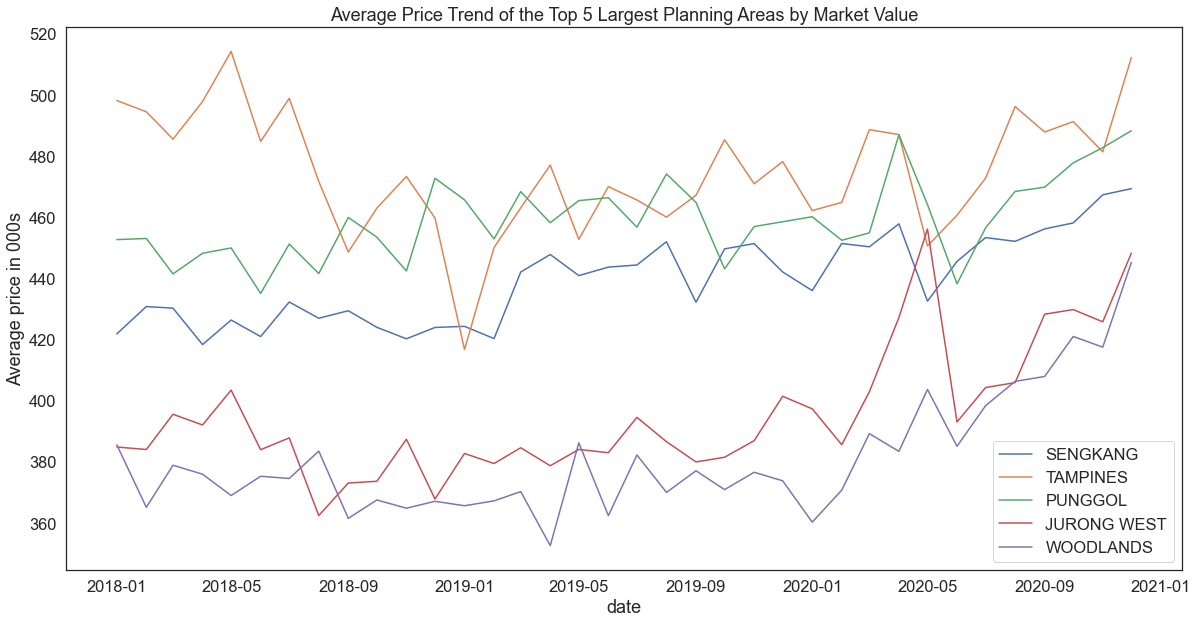

In [31]:
sns.set(font_scale=1.5, style='white')
fig, ax = plt.subplots(figsize=(20,10))

table = pd.pivot_table(hdb_data_eda, values='resale_price', index=hdb_data_eda.index,
                       columns=['pln_area'], aggfunc=np.mean)

for i in hdb_data_eda.groupby('pln_area')['resale_price'].sum().nlargest(5).index:
    g = sns.lineplot(x=table.index, y=table[i])

ax.set(ylabel='Average price in 000s')
ax.legend(labels=hdb_data_eda.groupby('pln_area')['resale_price'].sum().nlargest(5).index)
ax.title.set_text('Average Price Trend of the Top 5 Largest Planning Areas by Market Value')
plt.show()

Areas such as Jurong West and Sengkang have a strong upwards trend throughout 2018-2020. This could be due to the fact that there are more amenities and facilities being built in these areas. 

### **5.5 Compound Monthly Growth Rates in Average Price by Planning Area**

To examine the planning areas driving the growth of average resale prices, we compute compound monthly growth rate of average resale HDB price in all planning areas.

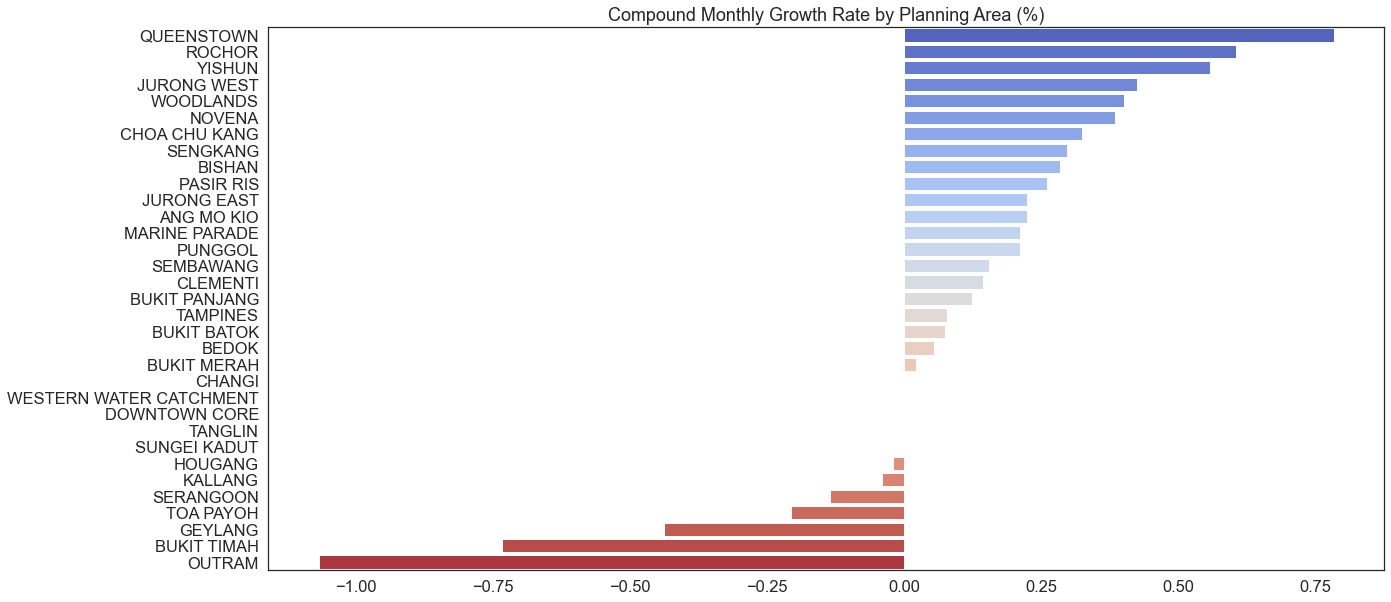

In [32]:
table = pd.pivot_table(hdb_data_eda, values='resale_price', index=hdb_data_eda.index,
                       columns=['pln_area'], aggfunc=np.mean)

growth_dict = {}

for i in table.columns.tolist():
    months = len(table)
    cmgr = (((table[i][-1] / table[i][0]) ** (1/months)) - 1)*100
    
    if np.isnan(cmgr):
        growth_dict[i] = 0
        
    else: growth_dict[i] = cmgr

sns.set(font_scale=1.5, style='white')
fig, ax = plt.subplots(figsize=(20,10))        
sns.barplot(x=pd.Series(growth_dict).sort_values(ascending=False).values,
            y=pd.Series(growth_dict).sort_values(ascending=False).index,
            palette='coolwarm')
ax.title.set_text('Compound Monthly Growth Rate by Planning Area (%)')
plt.show()

We see that Queenstown area is driving most of the growth in average resale prices. One reason could be due to speculation about the government's Selective En Bloc Redevelopment (SERS) initiative, where the government buys back HDBs to redevelop before lease expiry. In the recent years, most of the HDB estates chosen for SERS took place within or near the Queenstown area. On the end, we see that resale HDB prices are falling in Outram, Bukit Timah. These areas although central, do not have a high number of resale flats, and many of these flats are older as well, potentially explaining the decline in average price. 

## **6. Summary**

In this exploratory data analysis, we took a deep look at the variables in our dataset and derived some interesting insights.

**Key Insights:**

1. Resale HDB prices are higher in the central region of Singapore
2. Positive relationship between resale price and floor area, flat type, remaining lease variables
3. Negative relationship between resale price and geographic features like distance to nearest MRT station. Geographic features may be collinear with each other as well.
4. The total resale HDB market has grown since 2018, reaching a 3 year all time high by late 2020. 
5. COVID-19 Pandemic has not affected the growth in the market.
6. In Punggol and Sengkang, a large percentage of flats sold have remaining lease aboe 94 years, suggesting that alot of HDB owners are selling after the minimum occupation period of 5 years.
7. Average resale price is growing the most in Queenstown, Rochor, Yishun.

In Part III of this project, we will train several statistical and machine learning models to understand the relationships between features.